# complexity.py file

In [1]:
# when comparing None is best to use 'is not' rather then '!='
#https://stackoverflow.com/questions/2209755/python-operation-vs-is-not

In [2]:
'''
Throughout This task I found the resources online very helpful to understand
concepts and coding techniques. The code I have used below
is my own code except where I have explicitly stated otherwise.
'''

'\nThroughout This task I found the resources online very helpful to understand\nconcepts and coding techniques. The code I have used below\nis my own code except where I have explicitly stated otherwise.\n'

In [3]:
class TreeNode:
    def __init__(self, value=None):
        self.value=value
        self.left_child=None
        self.right_child=None

    # getters methods
    def get_value(self):
        return self.value
    
    def get_left_child(self):
        return self.left_child
    
    def get_right_child(self):
        return self.right_child
    
    # setters methods
    def set_value(self,value=None):
        self.value=value
        
    def set_left_child(self,left_child=None):
        self.left_child=left_child
        
    def set_right_child(self,right_child=None):
        self.right_child=right_child

# code for visualising the tree was adapted from a stackoverflow answer.
# link: https://stackoverflow.com/questions/62406562/
    def __str__(self):
        BST_visual = []
        #for drawings we have used unicodes
        if self.get_right_child() is not None:
            node_located = False
            for node in str(self.get_right_child()).split("\n"):
                # we found a node
                if node[0] != " ":
                    node_located = True
                    node = " ┌" + node
                # if we haven't found a node then keep drawing lines
                elif node_located:         
                    node = " │ " + node
                # if neither is true then we draw empty space    
                else: 
                    node = "   " + node
                BST_visual.append(node)       
        BST_visual.append(str(self.get_value()))
        # now we do the same for the left side of the tree
        if self.get_left_child() is not None:
            node_located = False
            for node in str(self.get_left_child()).split("\n"):
                if node[0] != " ":
                    node_located = True
                    node = " └" + node
                elif node_located:
                    node = "   " + node
                else:
                    node = " │ " + node
                BST_visual.append(node)
        return "\n".join(BST_visual)



class BinarySearchTree:
    def __init__(self, size_limit=None): 
        self.root = None
        self.size_limit=size_limit
    
    #getters method
    def get_root(self):
        return self.root
    
    def get_size_limit(self):
        return self.size_limit

    
    # setters method
    def set_root(self,value=None):
        self.root=value
        
    def set_size_limit(self,value=None):
        self.size_limit=value
        
    #is_empty checks if tree is empty
    def is_empty(self):
        if self.get_root() is None:
            return True
        else: 
            return False
    
    # for 'is_full()' we will have a private method '_is_full()' 
    # which will only be acceble through this accessor method.
    def is_full(self):
        #only check if it is full when a 'size_limit' is entered
        if self.get_size_limit() is not None:
            if self._is_full(self.root,0) < self.get_size_limit():
                return False
            else:
                return True
        else:
            return False

    
    # this "_is_full()" private fuction will work out number of nodes we have.
    def _is_full(self, root, n_nodes):
        if root is None:
            return n_nodes
        else:
            return self._is_full(root.get_left_child(),
                                 self._is_full(root.get_right_child(), 
                                 n_nodes+1))        
  

    #returns a boolean indicating if an item is in the tree or not
    def search(self, new_value):
        # don't search if the tree is empty
        if self.is_empty():
            return False
        else:
            return self._search(new_value, self.get_root())
    
    def _search(self,new_value, our_node):
        # it could be that our current node value is the value we want.
        if new_value == our_node.get_value():
            return True
        elif new_value < our_node.get_value():
            # if new value is less then our node value and the
            # left child is not none then search on the left child
            if our_node.get_left_child() is not None:
                return self._search(new_value,our_node.get_left_child())    
        elif new_value > our_node.get_value():
            if our_node.get_right_child() is not None:
                return self._search(new_value,our_node.get_right_child())   
        # if we haven't been able to find it in the tree then return False.
        return False


    def insert(self, new_value):
        if self.is_empty():
            self.root = TreeNode(new_value)
        else:
            # only insert value if the tree is not full
            if self.is_full()==False:
                self._insert(new_value, self.get_root())

    def _insert(self, new_value, our_node):
        # check how the new value that we want to insert 
        # compares with the value in the node we are looking at
        if new_value > our_node.get_value():
            if our_node.get_right_child() is None:
                our_node.set_right_child(TreeNode(new_value))
            else:
                # if right child has a value then run a ruccursive 
                # insert function on the right child.
                self._insert(new_value,our_node.get_right_child())

        elif new_value < our_node.get_value():
            if our_node.get_left_child() is None:
                our_node.set_left_child(TreeNode(new_value))
            else:
                self._insert(new_value,our_node.get_left_child())

        #otherwise we know that the value is in the Tree. 
        else:
            print("Value already exits in the tree")
 
            
    def delete(self,new_value):
        if self.is_empty():
            return False
        else:
            self._delete(new_value,self.get_root())
            
    # we need to delete in a way that BST properties hold.therefore
    # when deleting a node we will consider if the node has 0 children
    # 1 child or 2 children. we will also deal with a speacial case where
    # we have to delete the root node.
    def  _delete(self, new_value, our_node):

        if new_value > our_node.get_value():
            if our_node.get_right_child() is None:
                print("Value not in the tree")
            else:
                our_node.set_right_child(self._delete(new_value,our_node.right_child))

        elif new_value < our_node.get_value():
            if our_node.get_right_child() is None:
                print("Value not in the tree")
            else:
                our_node.set_left_child(self._delete(new_value,our_node.left_child))
            
        # Otherwise the value we want to delete is equal to the value 
        #  of our current node. 
        else:
            # -----Root node special case--------
            # There is a special case we need to deal with where we we want
            # to delete our root node 
            if our_node==self.root:
                # root with 1-child or no child
                if our_node.get_right_child() is None:
                    self.root=our_node.get_left_child()
                    our_node.left_child = None
                elif our_node.get_left_child() is None:
                    self.root=our_node.get_right_child()
                    our_node.right_child = None
                # else we have root with 2-children. we repalce it with right child  
                else:
                    self.root = our_node.right_child
                    self.root.set_left_child(our_node.left_child)
#                     our_node.right_child = None
#                     our_node.left_child = None
                    return self.root
                    
            # -----Non-Root nodes--------    
            else:        
                # Node with only one child or no child
                if our_node.get_right_child() is None:
                    return our_node.left_child
                    our_node = None

                elif our_node.get_left_child() is None:
                    return our_node.right_child
                    our_node = None
                    
                # or the has two children. In which case we replace the 
                # value of the node we want to delete with the smallest value
                # going down left child of the right child of our node.
                else:
                    node = our_node.right_child
                    while node.left_child is not None:
                        node = node.left_child
                    our_node.value = node.value
                    our_node.right_child = self._delete(node.value, our_node.right_child)
        return our_node
        
        
#---------------------------------------------------           
    # for traverse function we will do an in order traversal
    # this will allow us to print the node values in order.
    def traverse(self):
        if self.is_empty():
            print("The tree has no values")
        else:
            return self._traverse(self.get_root())

    def _traverse(self, our_node):
        in_order_trav = []
        if our_node is not None:
            in_order_trav = self._traverse(our_node.get_left_child())
            in_order_trav.append(our_node.get_value())
            in_order_trav += self._traverse(our_node.get_right_child())
        return in_order_trav
 

    def print_tree(self):
        print(f"Below is a visual representation of our Tree."
              f" The tree is drawn from left to right:")
        print(str(self.get_root()))

        
import random
from random import randint
# import Binarysearchtree
# first 
def random_tree(n):
    BST = BinarySearchTree()
    # generate n unique random numbers between 1 to 1000
    n_random = random.sample(range(1, 1001), n) 
    for i in n_random:
        BST.insert(i)
    return BST

test = BinarySearchTree()


print(test.is_full())
print("-"*20) 
test.insert(5)
test.insert(6)
test.insert(3)
test.insert(2)
test.insert(4)
test.insert(3)
test.insert(2)
test.insert(4)
test.insert(4)
test.insert(3)
test.insert(2)

# test.insert(8)
# test.insert(20)


test.delete(3)

print(test.traverse())
test.print_tree()

False
--------------------
Value already exits in the tree
Value already exits in the tree
Value already exits in the tree
Value already exits in the tree
Value already exits in the tree
Value already exits in the tree
[2, 4, 5, 6]
Below is a visual representation of our Tree. The tree is drawn from left to right:
 ┌6
5
 └4
    └2


In [4]:
tree = random_tree(5)

tree.traverse()

[18, 115, 257, 516, 974]

In [5]:
# 2.3 - Random trees’ simulation ---------------------------

import random
from random import randint
# import Binarysearchtree
# first 
def random_tree(n):
    BST = BinarySearchTree()
    # generate n unique random numbers between 1 to 1000
    n_random = random.sample(range(1, 1001), n) 
    for i in n_random:
        BST.insert(i)
    return BST


X = [s for s in range(5,105,5)]
# average time to search for the number 42 in tree of size s
Y = []

import statistics
from statistics import mean
import time

for s in X:
    trees=[]
    for num in range(1000):
        tree=random_tree(s)
        trees.append(tree)
    start=time.time()
    for tree in trees:
        tree.search(42)
    end=time.time()
    avg_time = (end-start)/1000
    Y.append(avg_time)
    
    


In [6]:
# plt.plot(X, Y)

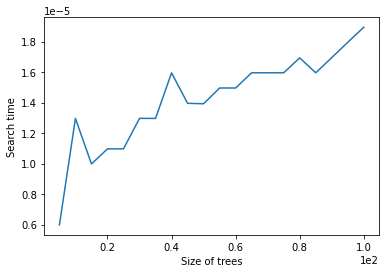

In [7]:
# 2.4 -  Complexity analysis for BSTs --------------------------
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.xlabel('Size of trees')
plt.ylabel('Search time')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.show()

In [8]:

'''
Complexity analysis X vs Y:
The relationship between X and Y seems to be somewhere between linear and logarithmic. The running time
seems to be closer to logarithmic time or 'O(log(n))' from what we can observe in the plot.
we can see that as the tree size increase from 5 to 100 the search time
increases logarithmically. we can observer that intially the search time 
increases rapidly as we would observe in log(n) and as we increase the number of 
inputs (i.e tree size)  the search time almost plateaus for larger tree size. so
So the rate of increase in search time decreases as tree-size increases.
'''

"\nComplexity analysis X vs Y:\nThe relationship between X and Y seems to be somewhere between linear and logarithmic. The running time\nseems to be closer to logarithmic time or 'O(log(n))' from what we can observe in the plot.\nwe can see that as the tree size increase from 5 to 100 the search time\nincreases logarithmically. we can observer that intially the search time \nincreases rapidly as we would observe in log(n) and as we increase the number of \ninputs (i.e tree size)  the search time almost plateaus for larger tree size. so\nSo the rate of increase in search time decreases as tree-size increases.\n"

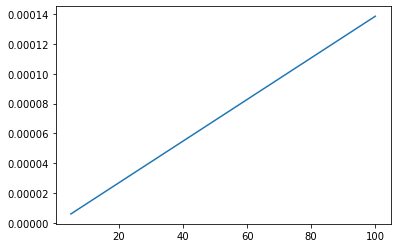

In [9]:
#2.4.3 - create a list Y2....
import numpy as np

Y2 = []

#firstly we need to find out the c and b values of the linear equation
# t=cn + b using the t for n=5 and n=10 from Y.
# we will write it in Ax=B form and solve.
A = np.array([[5,1],[10,1]])
# obtain t values for n=5 and n=10.
B = np.array([Y[0],Y[1]])
x = np.linalg.solve(A,B)
c = x[0]
b = x[1]
for s in X:
    t = c*s + b
    Y2.append(t)

plt.plot(X,Y2)

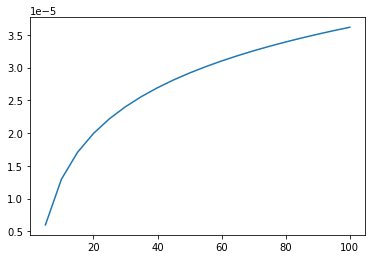

In [10]:
import math
from math import log

#2.4.4 - Y3 
Y3 = []

#Now we need to find out the c and b values of the Logarithmic equation
# t = c*log(n) + b using the t for n=5 and n=10 from Y.
# here we take log(n) = log2(n)

A = np.array([[log(5,2),1],[log(10,2),1]])
B = np.array([Y[0],Y[1]])
x = np.linalg.solve(A,B)
c = x[0]
b = x[1]
for s in X:
    t = c*log(s,2) + b
    Y3.append(t)


plt.plot(X,Y3)


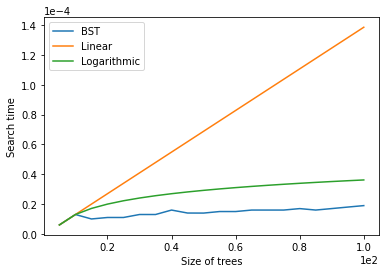

In [11]:
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.plot(X, Y2)
plt.plot(X, Y3)
plt.legend(['BST','Linear','Logarithmic'])
plt.xlabel('Size of trees')
plt.ylabel('Search time')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.show()

In [12]:
# the base might be higer then 2 so we are getting higher values

In [13]:
'''Complexity analysis X vs Y, Y2 and Y3:
When analysing time complexity, From the plot, we can see that the BST search complexity line has a 
shape similar to the ideal logarithmic curve. after repeatedly running the simulation, I obeserve that 
Although The BST search shows a logarithmic time it is slower then the ideal
logarithmic time.but it is faster then the ideal linear time. There are
various reason why the Y line does not follow exactly the same line as Y3. One of the
reasons could be becase my binary serach tree is not balanced. One way we 
can improve this is by having a balanced binary tree, this makes search 
faster because a balanced BST with n nodes has a average complexity of log2(n) which is 
our ideal logarithmic complexity. 

'''

'Complexity analysis X vs Y, Y2 and Y3:\nWhen analysing time complexity, From the plot, we can see that the BST search complexity line has a \nshape similar to the ideal logarithmic curve. after repeatedly running the simulation, I obeserve that \nAlthough The BST search shows a logarithmic time it is slower then the ideal\nlogarithmic time.but it is faster then the ideal linear time. There are\nvarious reason why the Y line does not follow exactly the same line as Y3. One of the\nreasons could be becase my binary serach tree is not balanced. One way we \ncan improve this is by having a balanced binary tree, this makes search \nfaster because a balanced BST with n nodes has a average complexity of log2(n) which is \nour ideal logarithmic complexity. \n\n'

# Linked List

In [27]:
class ListNode:
    def __init__(self,value=None,next=None):
        self.value = value
        self.next=None

    def print_node_value(self):
            print(f"{self.value}")
    
    #getters method
    def get_value(self):
        return self.value
    
    def get_next(self):
        return self.next
    
    # setters method
    def set_value(self,value=None):
        self.value=value
        
    def set_next(self, value=None):
        self.next = value
    

class LinkedList:
    def __init__(self,size_limit=None):
        self.first_node = None
        self.size_limit=size_limit 
        
        
    #getters method
    def get_first_node(self):
        return self.first_node
    
    def get_size_limit(self):
        return self.size_limit

    # setters method
    def set_first_node(self,value=None):
        self.first_node=value
        
    def set_size_limit(self,value=None):
        self.size_limit=value
        
    
    def is_empty(self):
        if self.get_first_node() is None:
            return True
        else:
            return False
        
    def is_full(self):
        #only check if it is full when a 'size_limit' is entered
        if self.get_size_limit() is not None:
            # if first node is not empty count until end
            # if count is less then size then not full
            if not self.is_empty():
                counter = 0
                node = self.get_first_node()
                while node != None:
                    counter+=1
                    node = node.get_next()
                if counter < self.get_size_limit():
                    return False
                else:
                    return True
            else:
                return False
        else:
            return False
        
        
    def __str__(self):
        list_visual =[]
        node = self.get_first_node()
        comment = str(f"Below is the Visual representation of our Linked list nodes, "
                      f"nodes are represented as [Value|Next], 'Value' is the value " 
                      f"of the current node and 'Next' is a pointer or ID of the "
                      f"next node in the linked list.")
        # the first node is 
        list_visual.append(str(f"[Head|{id(self.get_first_node())}]--->"))
        while node.next is not None:
            list_visual.append(str(f"[{node.get_value()}|{id(node.get_next())}]--->"))
            node = node.get_next()
        list_visual.append(str(f"[{node.get_value()}|'None']"))
        return comment + '\n\n' + str(" ".join(list_visual))

    

    def insert(self,value):
        new_node = ListNode(value)
        # check if first node is empty
        if self.is_empty():
            self.first_node = new_node
            return
        node = self.get_first_node()
        # go to the end and insert new_node
        while node.next is not None:
            node = node.get_next()
        # we only insert values if linked list not full
        if not self.is_full():
            node.next = new_node 

    # in search fuction we go through the nodes to find it.
    # if we dont' find it then we return False.
    def search(self, value):
        node = self.get_first_node()
        while node is not None:
            if node.get_value() == value:
                return True
            node = node.get_next()
        return False

    
    def delete(self, value):    
        if self.search(value) is True:
            prev_node = self.get_first_node()
            node = prev_node.get_next()
            # search through the linked list for the value
            found = False
            while found==False:
                if prev_node.value==value: #first node has our value
                    prev_node.set_value(node.get_value())
                    prev_node.set_next(node.get_next())
                    found=True
                elif node.value==value: 
                    #if last node has the value
                    if node.get_next() == None: 
                        node.set_value(prev_node.get_value())
                        prev_node.set_next(None)
                        found = True
                    # any middle node has our value
                    else:
                        node.set_value(node.next.value)
                        node.set_next(node.next.next)
                        found=True  
                prev_node = prev_node.get_next()
                node = node.get_next()

                
        else:
            print("Coulden't Remove Value. This value is not in the Linked List")
                    
            
            
    # we will do an in order traversal
    def traverse(self):
        node = self.first_node
        ordered_linked_list = []
        while node is not None:
            ordered_linked_list.append(node.value)
            node = node.next
        return ordered_linked_list

a = LinkedList()

a.insert(5)
a.insert(6)
a.insert(7)
a.insert(8)
a.insert(20)
a.insert(8)
a.insert(111)
a.insert(112)

a.delete(112)
#a.delete(111)
# a.delete(111)
print(a.search(111))
print(a.traverse())
print(a)

True
[5, 6, 7, 8, 20, 8, 111]
Below is the Visual representation of our Linked list nodes, nodes are represented as [Value|Next], 'Value' is the value of the current node and 'Next' is a pointer or ID of the next node in the linked list.

[Head|1596647868832]---> [5|1596647869840]---> [6|1596647869264]---> [7|1596647869648]---> [8|1596647868880]---> [20|1596647868592]---> [8|1596647868304]---> [111|'None']


In [15]:
# # old code - saved in dowloads
# class ListNode:
#     def __init__(self,value=None,next=None):
#         self.value = value
#         self.next=None

#     def node_value(self):
#             print(f"{self.value}")


# class LinkedList:
#     def __init__(self,size_limit=None):
#         self.first_node = None
#         self.size_limit=size_limit 

#     def is_empty(self):
#         if self.first_node is None:
#             return True
#         else:
#             return False
        
#     def is_full(self):
#         #only check if it is full when a 'size_limit' is entered
#         if self.size_limit is not None:
#             # if first node is not empty count until end
#             # if count is less then size then not full
#             if not self.is_empty():
#                 counter = 0
#                 node = self.first_node
#                 while node != None:
#                     counter+=1
#                     node = node.next
#                 if counter < self.size_limit:
#                     return False
#                 else:
#                     return True
#             else:
#                 return False
        
        
#     def __str__(self):
#         list_visual =[]
#         node = self.first_node
#         comment = str(f"Below is the Visual representation of our Linked list nodes, "
#                       f"nodes are represented as [Value|Next], 'Value' is the value " 
#                       f"of the current node and 'Next' is a pointer or ID of the "
#                       f"next node in the linked list.")
#         # the first node is 
#         list_visual.append(str(f"[Head|{id(self.first_node)}]--->"))
#         while node.next is not None:
#             list_visual.append(str(f"[{node.value}|{id(node.next)}]--->"))
#             node = node.next
#         list_visual.append(str(f"[{node.value}|'None']"))
#         return comment + '\n\n' + str(" ".join(list_visual))

            
#     def insert(self,value):
#         new_node = ListNode(value)
#         # check if first node is empty
#         if self.is_empty():
#             self.first_node = new_node
#             return
#         node = self.first_node
#         # got to the end and insert new_node
#         while node.next is not None:
#             node = node.next
#         # we only insert values if linked list not full
#         if not self.is_full():
#             node.next = new_node 

#     def search(self, value):
#         node = self.first_node
#         while node.next is not None:
#             if (node.value or node.next) == value:
#                 return True
#             else:
#                 node = node.next
#         return False

    
#     def delete(self, value):
#         if self.search(value) is True:
#             prev_node = self.first_node
#             node = prev_node.next
#             node_value = node.value
#             # search through the linked list for the value
#             while node.value != value:
#                 prev_node = prev_node.next
#                 node = node.next
#             # first lets deal with a unique case where
#             # the last node contains the value we are looking for
#             if node.next == None:
#                 node.value = prev_node.value
#                 prev_node.next = None
#             # otherwise if we find our value in a node then we set that
#             # node value as the next node value and we set the  
#             # next node as node after it.
#             else:
#                 node.value = node.next.value
#                 node.next = node.next.next
#         else:
#             print("This value is not in the Linked List")
            
            
#     # we will do an in order traversal
#     def traverse(self):
#         node = self.first_node
#         ordered_linked_list = []
#         while node is not None:
#             ordered_linked_list.append(node.value)
#             node = node.next
#         return ordered_linked_list


In [26]:
# # Iterative Python program to search an element
# # in linked list
 
# # Node class
# class Node:
     
#     # Function to initialise the node object
#     def __init__(self, data):
#         self.data = data # Assign data
#         self.next = None # Initialize next as null
 
# # Linked List class
# class LinkedList:
#     def __init__(self):
#         self.head = None # Initialize head as None
 
#     # This function insert a new node at the
#     # beginning of the linked list
#     def insert(self, new_data):
     
#         # Create a new Node
#         new_node = Node(new_data)
 
#         # 3. Make next of new Node as head
#         new_node.next = self.head
 
#         # 4. Move the head to point to new Node
#         self.head = new_node
 
#     # This Function checks whether the value
#     # x present in the linked list
#     def search(self, x):
 
#         # Initialize current to head
#         current = self.head
 
#         # loop till current not equal to None
#         while current != None:
#             if current.data == x:
#                 return True # data found
             
#             current = current.next
         
#         return False # Data Not found
 
 
# # # Code execution starts here
# # if __name__ == '__main__':
 
# #     # Start with the empty list
# #     llist = LinkedList()
 
# #     ''' Use push() to construct below list
# #         14->21->11->30->10 '''
# #     llist.push(10);
# #     llist.push(30);
# #     llist.push(11);
# #     llist.push(21);
# #     llist.push(14);
 
# #     if llist.search(21):
# #         print("Yes")
# #     else:
# #         print("No")
 
# a = LinkedList()

# a.insert(5)
# a.insert(6)
# a.insert(7)
# a.insert(8)
# a.insert(20)
# a.insert(8)
# a.insert(111)
# a.insert(112)

# print(a)

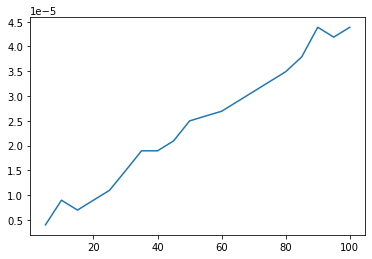

In [22]:
# complexity.py but for Linked lists
# import the linked list 
import random
from random import randint

# first 
def random_list(n):
    Linked_list = LinkedList()
    # generate n unique random numbers between 1 to 1000
    n_random = random.sample(range(1, 1001), n) 
    for i in n_random:
        Linked_list.insert(i)
    return Linked_list


X = [s for s in range(5,105,5)]
# average time to search for the number 42 in tree of size s
Y4 = []

import statistics
from statistics import mean
import time

for s in X:
    linked_list=[]
    for num in range(1000):
        l_list=random_list(s)
        linked_list.append(l_list)
    start=time.time()
    for value in linked_list:
        value.search(42)
    end=time.time()
    avg_time = (end-start)/1000
    Y4.append(avg_time)
        
import matplotlib.pyplot as plt
plt.plot(X,Y4)   

In [17]:
# random_list(50).__str__()

In [19]:
'''
 Complexity analysis X vs Y, Y2, Y3 and Y4:
 
 Linked list shows a linear complexity. the running time is linear O(n).
 We can observe that, as the input size(i.e size of trees) increases, the
 average search time also increases linearly. We can also
 see that in the plot the Linked List complexity plot closely matches the linear line
 plot. However, the Linked List takes longer then BSTs to search for the
 number 42. The search time difference between Linked List and BSTs also 
 increases as we increase the number of trees.

'''

'\n Complexity analysis X vs Y, Y2, Y3 and Y4:\n \n Linked list shows a linear complexity. the running time is linear O(n).\n We can observe that, as the input size(i.e size of trees) increases, the\n average search time also increases linearly. We can also\n see that in the plot the Linked List complexity plot closely matches the linear line\n plot. However, the Linked List takes longer then BSTs to search for the\n number 42. The search time difference between Linked List and BSTs also \n increases as we increase the number of trees.\n\n'

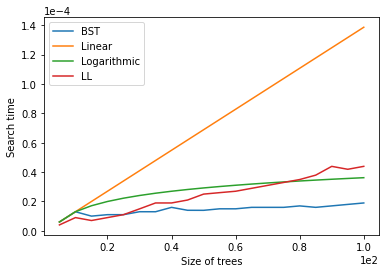

In [23]:
import matplotlib.pyplot as plt
plt.plot(X, Y)
plt.plot(X, Y2)
plt.plot(X, Y3)
plt.plot(X, Y4)
plt.legend(['BST','Linear','Logarithmic','LL'])
plt.xlabel('Size of trees')
plt.ylabel('Search time')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.show()